In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

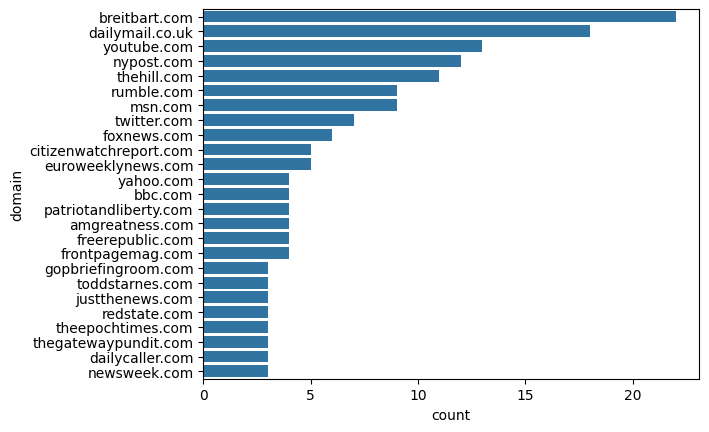

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

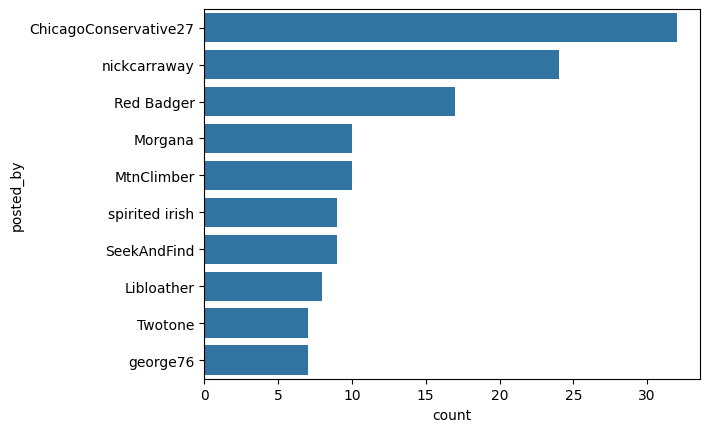

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_379865/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain         \
                                             count unique   
domain                posted_by                             
amgreatness.com       MtnClimber                 3      1   
bbc.com               nickcarraway               4      1   
breitbart.com         ChicagoConservative27     18      1   
dailycaller.com       MtnClimber                 1      1   
                      Red Badger                 2      1   
dailymail.co.uk       Libloather                 5      1   
                      Morgana                    6      1   
                      george76                   1      1   
euroweeklynews.com    nickcarraway               5      1   
foxnews.com           Libloather                 3      1   
frontpagemag.com      spirited irish             1      1   
msn.com               SeekAndFind                1      1   
newsweek.com          Twotone                    1      1   
nypost.com            nickcarraway               2      1   
                      ChicagoConservative27      3      1   
                      george76                   1      1   
patriotandliberty.com spirited irish             4      1   
redstate.com          SeekAndFind                2      1   
theepochtimes.com     george76                   2      1   
                      SeekAndFind                1      1   
thehill.com           ChicagoConservative27      8      1   
toddstarnes.com       Red Badger                 1      1   
                      spirited irish             2      1   
twitter.com           Red Badger                 1      1   
youtube.com           spirited irish             1      1   

                                                                         
                                                               top freq  
domain                posted_by                                          
amgreatness.com       MtnClimber                   amgreatness.com    3  
bbc.com               nickcarraway                         bbc.com    4  
breitbart.com         ChicagoConservative27          breitbart.com   18  
dailycaller.com       MtnClimber                   dailycaller.com    1  
                      Red Badger                   dailycaller.com    2  
dailymail.co.uk       Libloather                   dailymail.co.uk    5  
                      Morgana                      dailymail.co.uk    6  
                      george76                     dailymail.co.uk    1  
euroweeklynews.com    nickcarraway              euroweeklynews.com    5  
foxnews.com           Libloather                       foxnews.com    3  
frontpagemag.com      spirited irish              frontpagemag.com    1  
msn.com               SeekAndFind                          msn.com    1  
newsweek.com          Twotone                         newsweek.com    1  
nypost.com            nickcarraway                      nypost.com    2  
                      ChicagoConservative27             nypost.com    3  
                      george76                          nypost.com    1  
patriotandliberty.com spirited irish         patriotandliberty.com    4  
redstate.com          SeekAndFind                     redstate.com    2  
theepochtimes.com     george76                   theepochtimes.com    2  
                      SeekAndFind                theepochtimes.com    1  
thehill.com           ChicagoConservative27            thehill.com    8  
toddstarnes.com       Red Badger                   toddstarnes.com    1  
                      spirited irish               toddstarnes.com    2  
twitter.com           Red Badger                       twitter.com    1  
youtube.com           spirited irish                   youtube.com    1

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_379865/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
